In [1]:
import repath.data.datasets.tissuegame as game

dset = game.tissue_game()

In [2]:
dset.paths

,slide,annotation,label,tags
0,icaird_tissue/images_for_game/IC-CX-00069-01.i...,,,
1,icaird_tissue/images_for_game/IC-CX-00223-01.i...,,,
2,icaird_tissue/images_for_game/IC-CX-00271-01.i...,,,
3,icaird_tissue/images_for_game/IC-CX-00462-01.i...,,,
4,icaird_tissue/images_for_game/IC-CX-00526-01.i...,,,
...,...,...,...,...
95,icaird_tissue/images/IC-EN-02079-01.isyntax,icaird_tissue/annotations/IC-EN-02079-01.tiff.txt,,tissue_ann
96,icaird_tissue/images/IC-EN-02081-01.isyntax,icaird_tissue/annotations/IC-EN-02081-01.tiff.txt,,tissue_ann
97,icaird_tissue/images/IC-EN-02086-01.isyntax,icaird_tissue/annotations/IC-EN-02086-01.tiff.txt,,tissue_ann
98,icaird_tissue/images/IC-EN-02089-01.isyntax,icaird_tissue/annotations/IC-EN-02089-01.tiff.txt,,tissue_ann


In [3]:
# create two groups with and without annotations
import copy

dset_with = copy.deepcopy(dset)
dset_without = copy.deepcopy(dset)
dset_with.paths = dset_with.paths[dset_with.paths.tags == 'tissue_ann']
dset_without.paths = dset_without.paths[dset_without.paths.tags != 'tissue_ann']

In [4]:
dset_without.paths

,slide,annotation,label,tags
0,icaird_tissue/images_for_game/IC-CX-00069-01.i...,,,
1,icaird_tissue/images_for_game/IC-CX-00223-01.i...,,,
2,icaird_tissue/images_for_game/IC-CX-00271-01.i...,,,
3,icaird_tissue/images_for_game/IC-CX-00462-01.i...,,,
4,icaird_tissue/images_for_game/IC-CX-00526-01.i...,,,
...,...,...,...,...
83,icaird_blood/images/IC-EN-02227-01.isyntax,,,
84,icaird_blood/images/IC-EN-02254-01.isyntax,,,
85,icaird_blood/images/IC-EN-02262-01.isyntax,,,
86,icaird_blood/images/IC-EN-02263-01.isyntax,,,


In [5]:
dset_with.paths

,slide,annotation,label,tags
88,icaird_tissue/images/IC-CX-00001-01.isyntax,icaird_tissue/annotations/IC-CX-00001-01.tiff.txt,,tissue_ann
89,icaird_tissue/images/IC-CX-00002-01.isyntax,icaird_tissue/annotations/IC-CX-00002-01.tiff.txt,,tissue_ann
90,icaird_tissue/images/IC-CX-00004-01.isyntax,icaird_tissue/annotations/IC-CX-00004-01.tiff.txt,,tissue_ann
91,icaird_tissue/images/IC-CX-00005-01.isyntax,icaird_tissue/annotations/IC-CX-00005-01.tiff.txt,,tissue_ann
92,icaird_tissue/images/IC-CX-00006-02.isyntax,icaird_tissue/annotations/IC-CX-00006-02.tiff.txt,,tissue_ann
93,icaird_tissue/images/IC-CX-00010-01.isyntax,icaird_tissue/annotations/IC-CX-00010-01.tiff.txt,,tissue_ann
94,icaird_tissue/images/IC-CX-00014-01.isyntax,icaird_tissue/annotations/IC-CX-00014-01.tiff.txt,,tissue_ann
95,icaird_tissue/images/IC-EN-02079-01.isyntax,icaird_tissue/annotations/IC-EN-02079-01.tiff.txt,,tissue_ann
96,icaird_tissue/images/IC-EN-02081-01.isyntax,icaird_tissue/annotations/IC-EN-02081-01.tiff.txt,,tissue_ann
97,icaird_tissue/images/IC-EN-02086-01.isyntax,icaird_tissue/annotations/IC-EN-02086-01.tiff.txt,,tissue_ann


In [9]:
from repath.preprocess.patching import GridPatchFinder, SlidesIndex, CombinedIndex
from repath.preprocess.tissue_detection import TissueDetectorGreyScale, SizedClosingTransform, FillHolesTransform, TissueDetectorAll

level_in = 7

morphology_transform1 = SizedClosingTransform(level_in=level_in)
morphology_transform2 = FillHolesTransform(level_in=level_in)
morphology_transforms = [morphology_transform1, morphology_transform2]
tissue_detector_test = TissueDetectorGreyScale(grey_level=0.85, morph_transform = morphology_transforms)

In [10]:
psize = 2 ** level_in
patch_finder = GridPatchFinder(labels_level=level_in, patch_level=0, patch_size=psize, stride=psize, remove_background=False)

In [17]:
tissue_dataset = dset_with

# The tissue detector is applied over the top of the patch finder
# tissue detector all classes everything as foreground so will not change the foreground background labels from the annotations
tissue_detector_all = TissueDetectorAll()
tissue_patchsets_labelled = SlidesIndex.index_dataset(tissue_dataset, tissue_detector_all, patch_finder)
tissue_patches_labelled = CombinedIndex.for_slide_indexes([tissue_patchsets_labelled])

# create blank slides with just tissue detector labels
tissue_patchsets_detected = SlidesIndex.index_dataset(tissue_dataset, tissue_detector_test, patch_finder, notblank=False)


indexing IC-CX-00001-01.isyntax
indexing IC-CX-00002-01.isyntax
indexing IC-CX-00004-01.isyntax
indexing IC-CX-00005-01.isyntax
indexing IC-CX-00006-02.isyntax
indexing IC-CX-00010-01.isyntax
indexing IC-CX-00014-01.isyntax
indexing IC-EN-02079-01.isyntax
indexing IC-EN-02081-01.isyntax
indexing IC-EN-02086-01.isyntax
indexing IC-EN-02089-01.isyntax
indexing IC-EN-02092-01.isyntax
indexing IC-CX-00001-01.isyntax
indexing IC-CX-00002-01.isyntax
indexing IC-CX-00004-01.isyntax
indexing IC-CX-00005-01.isyntax
indexing IC-CX-00006-02.isyntax
indexing IC-CX-00010-01.isyntax
indexing IC-CX-00014-01.isyntax
indexing IC-EN-02079-01.isyntax
indexing IC-EN-02081-01.isyntax
indexing IC-EN-02086-01.isyntax
indexing IC-EN-02089-01.isyntax
indexing IC-EN-02092-01.isyntax


In [25]:
import numpy as np

tissue_patches_detected = CombinedIndex.for_slide_indexes([tissue_patchsets_detected])

# calculate confusion matrix
FPs = np.logical_and(tissue_patches_detected.patches_df.label, np.logical_not(tissue_patches_labelled.patches_df.label))
FNs = np.logical_and(np.logical_not(tissue_patches_detected.patches_df.label), tissue_patches_labelled.patches_df.label)

tissue_patches_detected.patches_df

,x,y,label,transform,slide_idx,cps_idx
0,0,0,0.0,1,0,0
1,128,0,0.0,1,0,0
2,256,0,0.0,1,0,0
3,384,0,0.0,1,0,0
4,512,0,0.0,1,0,0
...,...,...,...,...,...,...
760475,123520,100224,0.0,1,11,0
760476,123648,100224,0.0,1,11,0
760477,123776,100224,0.0,1,11,0
760478,123904,100224,0.0,1,11,0


In [21]:
tissue_patches_detected.patches_df['game_patch'] = np.logical_or(FPs, FNs)

# filter to get only game patches
tissue_patches_detected.patches_df = tissue_patches_detected.patches_df[tissue_patches_detected.patches_df.game_patch == True]

tissue_patches_detected.patches_df

602113 26424 108810 2138701


In [44]:
slide_paths = dset_with.paths.slide.tolist()
slide_paths = [str(sp) for sp in slide_paths]
tissue_patches_detected.patches_df['slide_path'] = [slide_paths[si] for si in tissue_patches_detected.patches_df.slide_idx]
tissue_patches_detected.patches_df

/home/ubuntu/anaconda3/envs/repath/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,x,y,label,transform,slide_idx,cps_idx,game_patch,slide_path
62,7936,0,1.0,1,0,0,True,icaird_tissue/images/IC-CX-00001-01.isyntax
63,8064,0,1.0,1,0,0,True,icaird_tissue/images/IC-CX-00001-01.isyntax
64,8192,0,1.0,1,0,0,True,icaird_tissue/images/IC-CX-00001-01.isyntax
65,8320,0,1.0,1,0,0,True,icaird_tissue/images/IC-CX-00001-01.isyntax
66,8448,0,1.0,1,0,0,True,icaird_tissue/images/IC-CX-00001-01.isyntax
...,...,...,...,...,...,...,...,...
757474,111872,99840,1.0,1,11,0,True,icaird_tissue/images/IC-EN-02092-01.isyntax
757522,118016,99840,1.0,1,11,0,True,icaird_tissue/images/IC-EN-02092-01.isyntax
758212,82176,99968,1.0,1,11,0,True,icaird_tissue/images/IC-EN-02092-01.isyntax
758347,99456,99968,1.0,1,11,0,True,icaird_tissue/images/IC-EN-02092-01.isyntax


In [51]:
from repath.utils.paths import project_root

tissue_patches_detected_out = tissue_patches_detected.patches_df.loc[:, ['x', 'y', 'label', 'slide_path']]
tissue_patches_detected_out.to_csv(project_root() / 'experiments' / 'tissuegame' / 'index_for_game_annot.csv', index=False)

In [52]:
tissue_patches_detected_out

,x,y,label,slide_path
62,7936,0,1.0,icaird_tissue/images/IC-CX-00001-01.isyntax
63,8064,0,1.0,icaird_tissue/images/IC-CX-00001-01.isyntax
64,8192,0,1.0,icaird_tissue/images/IC-CX-00001-01.isyntax
65,8320,0,1.0,icaird_tissue/images/IC-CX-00001-01.isyntax
66,8448,0,1.0,icaird_tissue/images/IC-CX-00001-01.isyntax
...,...,...,...,...
757474,111872,99840,1.0,icaird_tissue/images/IC-EN-02092-01.isyntax
757522,118016,99840,1.0,icaird_tissue/images/IC-EN-02092-01.isyntax
758212,82176,99968,1.0,icaird_tissue/images/IC-EN-02092-01.isyntax
758347,99456,99968,1.0,icaird_tissue/images/IC-EN-02092-01.isyntax


In [36]:
from repath.utils.export import find_patches_close_to_edge

tissue_dataset = dset_without

# create blank slides with just tissue detector labels
tissue_patchsets_detected = SlidesIndex.index_dataset(tissue_dataset, tissue_detector_test, patch_finder, notblank=False)

# find patches close to edges
tissue_patchsets_edges = find_patches_close_to_edge(tissue_dataset, tissue_patchsets_detected, tissue_detector_test, level_in, 4)

indexing IC-CX-00069-01.isyntax
indexing IC-CX-00223-01.isyntax
indexing IC-CX-00271-01.isyntax
indexing IC-CX-00462-01.isyntax
indexing IC-CX-00526-01.isyntax
indexing IC-CX-00550-01.isyntax
indexing IC-CX-00765-01.isyntax
indexing IC-CX-00773-01.isyntax
indexing IC-CX-01105-01.isyntax
indexing IC-CX-01136-01.isyntax
indexing IC-CX-01208-01.isyntax
indexing IC-CX-01274-01.isyntax
indexing IC-CX-01294-01.isyntax
indexing IC-CX-01485-01.isyntax
indexing IC-CX-01553-01.isyntax
indexing IC-CX-01561-01.isyntax
indexing IC-CX-01591-01.isyntax
indexing IC-CX-01613-01.isyntax
indexing IC-CX-01648-01.isyntax
indexing IC-CX-01677-01.isyntax
indexing IC-CX-01778-01.isyntax
indexing IC-CX-01780-01.isyntax
indexing IC-CX-01805-01.isyntax
indexing IC-CX-01891-01.isyntax
indexing IC-CX-01898-01.isyntax
indexing IC-CX-01910-01.isyntax
indexing IC-CX-01914-01.isyntax
indexing IC-CX-01963-01.isyntax
indexing IC-CX-02078-01.isyntax
indexing IC-CX-02086-01.isyntax
indexing IC-CX-02121-01.isyntax
indexing

In [37]:
# combine into one
tissue_patches_edges = CombinedIndex.for_slide_indexes([tissue_patchsets_edges])

# filter to get only edge patches
tissue_patches_edges.patches_df = tissue_patches_edges.patches_df[tissue_patches_edges.patches_df.game_patch == True]

In [38]:
tissue_patches_edges.patches_df

,x,y,label,transform,game_patch,slide_idx,cps_idx
0,0,0,1.0,1,True,0,0
1,128,0,1.0,1,True,0,0
2,256,0,1.0,1,True,0,0
3,384,0,1.0,1,True,0,0
4,512,0,1.0,1,True,0,0
...,...,...,...,...,...,...,...
688244,75520,97152,0.0,1,True,87,0
688245,75648,97152,0.0,1,True,87,0
688246,75776,97152,1.0,1,True,87,0
688247,75904,97152,0.0,1,True,87,0


In [53]:
slide_paths = dset_without.paths.slide.tolist()
slide_paths = [str(sp) for sp in slide_paths]
tissue_patches_edges.patches_df['slide_path'] = [slide_paths[si] for si in tissue_patches_edges.patches_df.slide_idx]
tissue_patches_edges.patches_df

,x,y,label,transform,game_patch,slide_idx,cps_idx,slide_path
0,0,0,1.0,1,True,0,0,icaird_tissue/images_for_game/IC-CX-00069-01.i...
1,128,0,1.0,1,True,0,0,icaird_tissue/images_for_game/IC-CX-00069-01.i...
2,256,0,1.0,1,True,0,0,icaird_tissue/images_for_game/IC-CX-00069-01.i...
3,384,0,1.0,1,True,0,0,icaird_tissue/images_for_game/IC-CX-00069-01.i...
4,512,0,1.0,1,True,0,0,icaird_tissue/images_for_game/IC-CX-00069-01.i...
...,...,...,...,...,...,...,...,...
688244,75520,97152,0.0,1,True,87,0,icaird_blood/images/IC-EN-02264-01.isyntax
688245,75648,97152,0.0,1,True,87,0,icaird_blood/images/IC-EN-02264-01.isyntax
688246,75776,97152,1.0,1,True,87,0,icaird_blood/images/IC-EN-02264-01.isyntax
688247,75904,97152,0.0,1,True,87,0,icaird_blood/images/IC-EN-02264-01.isyntax


In [54]:
from repath.utils.paths import project_root

tissue_patches_edges_out = tissue_patches_edges.patches_df.loc[:, ['x', 'y', 'label', 'slide_path']]
tissue_patches_edges_out.to_csv(project_root() / 'experiments' / 'tissuegame' / 'index_for_game_edges.csv', index=False)

In [33]:
# get four samples
annot_tissue = tissue_patches_detected_out[tissue_patches_detected_out.label == 1]
annot_background = tissue_patches_detected_out[tissue_patches_detected_out.label == 0]
edges_tissue = tissue_patches_edges_out[tissue_patches_edges_out.label == 1]
edges_background = tissue_patches_edges_out[tissue_patches_edges_out.label == 0]

108810

In [66]:
# sample 1000 patches
start_no = 0


In [68]:
import pandas as pd

def create_npatches_df(start_no, npatches=1000):
    # get values for no of patches
    npatches = 1000
    nannot = int(npatches * 0.2)
    nedges = npatches - nannot
    nannot_tiss = int(nannot / 2)
    nannot_back = nannot - nannot_tiss
    nedges_tiss = int(nedges / 2)
    nedges_back = nedges - nedges_tiss
    
    # create sample of each dataframe
    atiss = annot_tissue.sample(nannot_tiss)
    aback = annot_background.sample(nannot_back)
    etiss = edges_tissue.sample(nedges_tiss)
    eback = edges_background.sample(nedges_back)
    # combine into one
    patches_list = pd.concat((atiss,aback,etiss,eback), axis=0, ignore_index=True)
    
    # tidy up and add patch number for output
    patches_list = patches_list.loc[:, ['x', 'y', 'slide_path', 'label']]
    patches_list['label'] = np.where(patches_list.label == 1, "tissue", "background")
    patches_list = patches_list.sample(frac=1)
    patches_list['patch_no'] = list(range(start_no, start_no + patches_list.shape[0]))
    
    return patches_list
    

In [71]:
tenthousand_patches = pd.DataFrame()
for xx in range(10):
    startn = 1000 * xx
    thousand_patches = create_npatches_df(startn)
    tenthousand_patches = pd.concat((tenthousand_patches, thousand_patches), axis=0, ignore_index=True)
    
tenthousand_patches


,x,y,slide_path,label,patch_no
0,101120,62208,icaird_blood/images/IC-EN-02125-01.isyntax,background,0
1,79744,90368,icaird_tissue/images/IC-EN-02079-01.isyntax,tissue,1
2,130304,42112,icaird_tissue/images_for_game/IC-CX-02343-01.i...,tissue,2
3,0,5504,icaird_tissue/images/IC-CX-00004-01.isyntax,tissue,3
4,128,21248,icaird_tissue/images/IC-CX-00004-01.isyntax,tissue,4
...,...,...,...,...,...
9995,67712,23040,icaird_tissue/images/IC-EN-02079-01.isyntax,background,9995
9996,68480,59648,icaird_blood/images/IC-EN-02192-01.isyntax,tissue,9996
9997,49536,21504,icaird_tissue/images/IC-EN-02092-01.isyntax,background,9997
9998,40960,4992,icaird_tissue/images/IC-EN-02079-01.isyntax,background,9998


In [72]:
tenthousand_patches.to_csv(project_root() / 'experiments' / 'tissuegame' / 'tenthousand_patches.csv', index=False)

In [86]:
import cv2

from repath.data.slides.isyntax import Slide
from repath.data.slides import Region

psize = 128
plevel = 0

output_dir = project_root() / 'experiments' / 'tissuegame' / 'patches'

for sl_idx, sl_group in tenthousand_patches.groupby('slide_path'):
    with Slide(project_root() / 'data' / sl_idx) as slide:
        print(f"Writing patches for {sl_idx}")
        for row in sl_group.itertuples():
            # read the patch image from the slide
            region = Region.patch(row.x, row.y, psize, plevel)
            image = slide.read_region(region)

            # write out the slide
            patch_filename = str(row.patch_no) + ".png"
            image_path = output_dir / patch_filename
            image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
            cv2.imwrite(str(image_path), np.array(image))


Writing patches for icaird_blood/images/IC-EN-02085-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02090-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02091-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02097-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02099-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02104-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02106-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02107-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02110-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02112-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02113-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02114-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02115-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02117-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02121-01.isyntax
Writing patches for icaird_blood/images/IC-EN-02123-01.

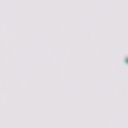

In [91]:
from PIL import Image
Image.open(project_root() / 'experiments' / 'tissuegame' / 'patches' / '9995.png')